# Учебный проект 7_Обучение с учителем: качество модели

## Содержание

* [Описание проекта](#описание-проекта)
* [Импорт библиотек Python и загрузка данных](#импорт-библиотек-python-и-загрузка-данных)
* [Предобработка данных](#предобработка-данных)
* [Исследовательский анализ данных](#исследовательский-анализ-данных)
* [Корреляционный анализ данных](#объединение-данных)
* [Построение моделей линейной регрессии](#построение-моделей-линейной-регрессии)
    * [Первая модель линейной регрессии](#первая-модель-линейной-регрессии)
    * [Вторая модель линейной регрессии](#вторая-модель-линейной-регрессии)
    * [Третья модель линейной регрессии](#третья-модель-линейной-регрессии)
    * [Прогноз удоя коров](#прогноз-удоя-коров)
* [Построение модели логистической регрессии](#построение-модели-лостической-регрессии)
    * [Обучение модели и анализ ее качества]()
    * [Прогноз вкуса молока](#прогноз-вкуса-молока)
* [Подготовка финального свода покупки коров](#подготовка-финального-свода-покупки-коров)
* [Общий вывод по исследованию](#общий-вывод-по-исследованию)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные `поведении покупателей на сайте интернет-магазина, выручке магазина с одного покупателя, времени посещения покупателями сайта интернет-магазина и таблица с данными о среднемесячной прибыли продавца за последние 3 месяца`, которые были предоставлены руководством компании "В один клик".

---

`Задача`

**Разработать модели машинного обучения для персонализации предложений постоянным клиентам магазина**:

---

`Путь решения`

1. Промаркировать уровень финансовой активности постоянных покупателей: `снизилась` - если клиент стал покупать меньше товаров; `прежний уровень`;
2. Собрать данные по клиентам по следующим группам:
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом;
    * Признаки, которые описывают продуктовое поведение покупателя;
    * Признаки, которые описывают покупательское поведение клиента;
    * Признаки, которые описывают поведение покупателя на сайте.
3. Построить модель, которая `предскажет вероятность снижения покупательской активности клиента в следующие 3 месяца`;
4. Провести исследование прибыльности клиента - `какой доход каждый покупатель приносил компании за последние 3 месяца`;
5. Выделить сегменты покупателей и разработать для них персонализированные предложения.

---

`Располагаемые данные`

**Поведение покупателя на сайте - market_file**

* id - номер покупателя в корпоративной базе данных;
* Покупательская активность — рассчитанный класс покупательской активности (целевой признак): `снизилась` или `прежний уровень`;
* Тип сервиса — уровень сервиса, например `премиум` и `стандарт`;
* Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель;
* Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента;
* Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце;
* Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте;
* Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев;
* Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев;
* Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца;
* Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца;
* Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта;
* Страниц_за_визит - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**Данные о выручке с покупателя - market_money**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксирована выручка. Например, `текущий_месяц` или `предыдущий_месяц`;
* Выручка - сумма выручки за период.

**Данные о времени, которое покупатель провел на сайте - market_time**

* id — номер покупателя в корпоративной базе данных;
* Период — название периода, во время которого зафиксировано общее время;
* минут — значение времени, проведённого на сайте, в минутах.

**Данные о среднемесячной прибыли продавца за последние 3 месяца - money**

* id - номер покупателя в корпоративной базе данных;
* Прибыль - значение прибыли.

## Импорт библиотек Python и загрузка данных <a class = 'anchor' id = 'Импорт'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
    * для решения задач машинного обучения.
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменных в соответствие с названиями загружаемых датасетов:
    * **market_file**;
    * **market_money**;
    * **market_time**;
    * **money**;
3. Вывод на экран параметров датасетов:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * общей информации о наборе данных;
    * визуализация распределения количественных показателей.
4. Формирование вывода по итогам данного этапа.

In [41]:
# импорт библиотек python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# модели классификации
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

# метрики оценки эффективности моделей
from sklearn.metrics import (accuracy_score,
                             recall_score,
                             precision_score,
                             confusion_matrix,
                             f1_score,
                             roc_auc_score)

# механизмы отбора данных и подбора параметров моделей
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from optuna.integration import OptunaSearchCV
from optuna import distributions, visualization

# механизмы подготовки данных
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   PolynomialFeatures)

# механизмы устранения дисбаланса классов
from imblearn.over_sampling import RandomOverSampler

# механизмы построения пайплайнов
from sklearn.pipeline import Pipeline

In [42]:
# загрузка данных в рабочую среду
try:
    market_file = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_file.csv', sep = ',') # поведение покупателя на сайте
    market_money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_money.csv', sep = ',') # выручка с покупателя
    market_time = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/market_time.csv', sep = ',') # время, проведенное покупателем на сайте
    money = pd.read_csv('~/Desktop/YandexPraktikum_projects/datasets/money.csv', sep = ';') # среднемесячная прибыль продавца за последние 3 месяца
except:
    market_file = pd.read_csv('/datasets/market_file.csv', sep = ',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep = ',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep = ';')
    money = pd.read_csv('/datasets/money.csv', sep = ';')

In [43]:
# инициализация пользовательской функции для первичного изучения содержимого наборов данных
def  first_meeting (df : pd.DataFrame, df_name : str) -> None:
    print(f'Структура набора данных {df_name}')
    display(df.head())
    print('Общая информация о наборе')
    print(df.info())
    print()

In [44]:
# инициализация пользовательской функции построения распределений числовых признаков
def num_distribution(df : pd.DataFrame, sizes: tuple, bins : int):
    df.iloc[:, 1:].hist(figsize = sizes,
                        grid = False,
                        bins = bins) # исключаем столбец с id пользователей - по умолчанию у него всегда 1-ый номер
    plt.grid(False)
    plt.show()

Структура набора данных market_file


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошиб

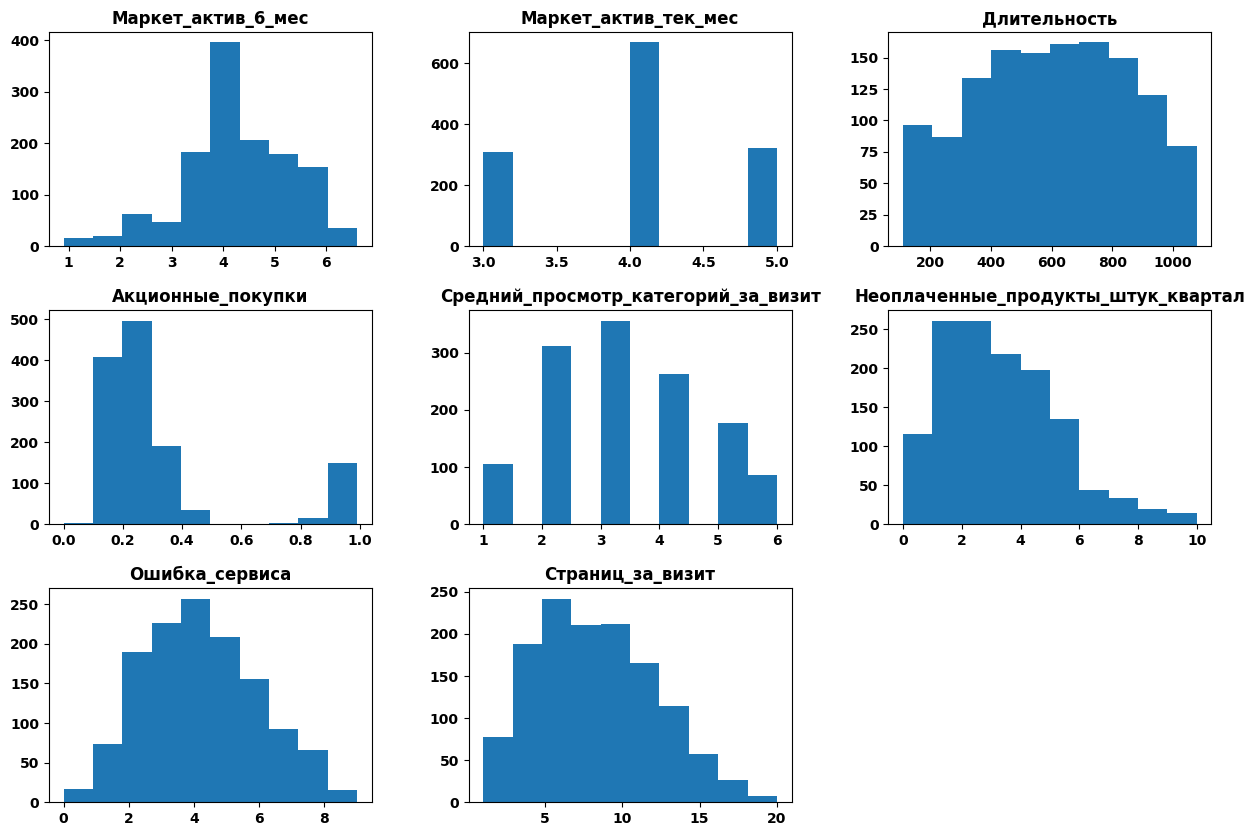

In [45]:
# вывод на экран параметров датасета 'market_file'
first_meeting(market_file, 'market_file')
num_distribution(market_file, (15, 10), 10)

Структура набора данных market_money


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None



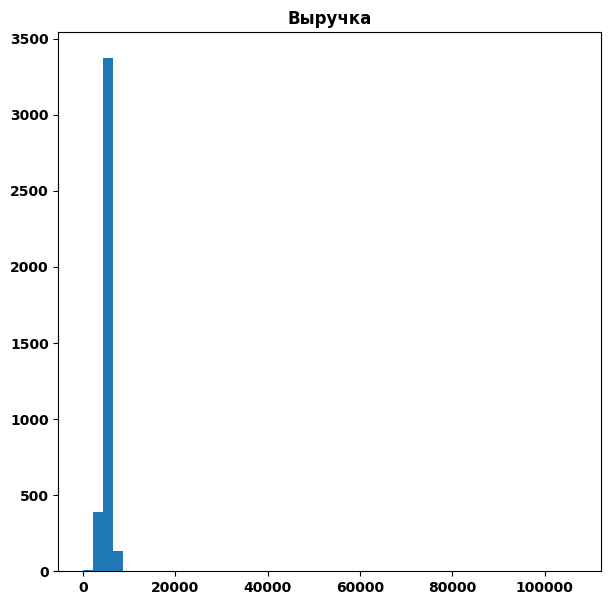

In [46]:
first_meeting(market_money, 'market_money')
num_distribution(market_money, (7, 7), 50)

Структура набора данных market_time


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None



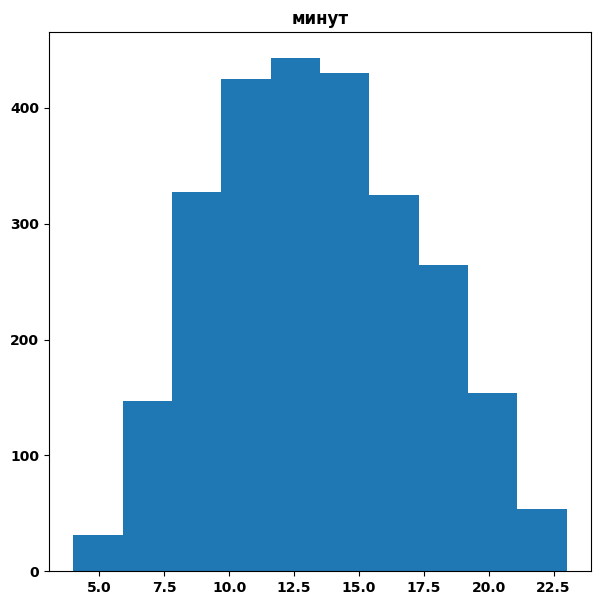

In [47]:
first_meeting(market_time, 'market_time')
num_distribution(market_time, (7, 7), 10)

Структура набора данных money


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общая информация о наборе
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None



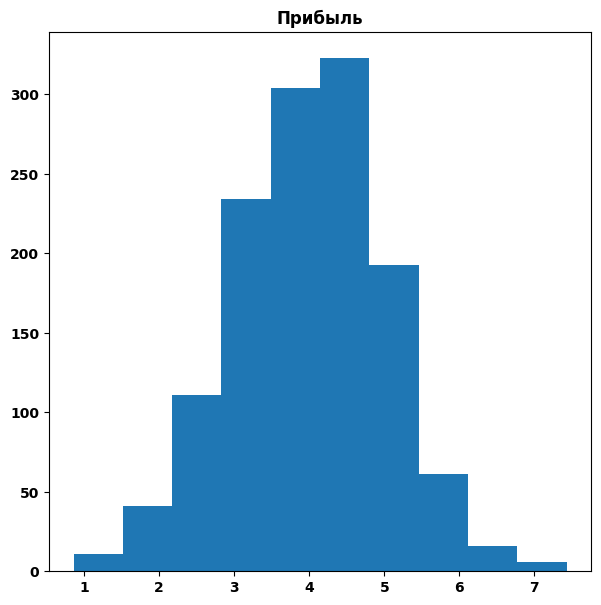

In [48]:
# преобразование типа данных в столбце 'Прибыль'
money['Прибыль'] = pd.to_numeric(money['Прибыль'].str.replace(',', '.'))

first_meeting(money, 'money')
num_distribution(money, (7, 7), 10)

**Вывод**

1. Импортированы библиотеки Python:
    * для манипулирования данными:
        * pandas;
        * numpy.
    * для визуализации данных:
        * matplotlib.pyplot;
        * seaborn.
    * для решения задач машинного обучения:
        * LogisticRegression - модель логистической регрессии;
        * KNeighborsClassifier - модель k-ближайших соседей;
        * SVC - машина опорных векторов;
        * DecisionTreeClassifier - модель дерева принятия решений;
        * plot_tree - визуализация дерева решений;
        * метрики оценки эффективности моделей классификации;
        * train_test_split - механизм разделения данных;
        * GridSearchCV - механизм поиска гиперпараметров с перебором по "сетке";
        * RandomizedSearchCV - механизм поиска гиперпараметров со случайным перебором;
        * cross_val_score - механизм проверки модели на кросс-валидации;
        * OptunaSearchCV - механизм поиска гиперпараметров с помощью библиотеки Optuna;
        * distributions - распределения для Optuna;
        * visualization - визуализация для Optuna;
        * StandardScaler - стандартизация данных;
        * MinMaxScaler - нормализация данных;
        * OrdinalEncoder - порядковое кодирование категориальных признаков;
        * OneHotEncoder - one-hot кодирование категориальных признаков;
        * PolynomialFeatures - полиномиальные признаки;
        * RandomOverSampler - механизм устранения дисбаланса классов;
        * Pipeline - механизм построения пайплайнов.
2. Произведена загрузка данных в рабочую среду Jupyter Notebook. Инициализированы переменные в соответствие с названиями загружаемых датасетов:
    * `market_file`;
    * `market_money`;
    * `market_time`;
    * `money`;
3. Выведены на экран параметры датасетов:
    * `market_file`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"стандартт"** в столбце **Тип сервиса**). Требуется проверка набора данных на неявные дубликаты.
    * `market_money`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах.
    * `market_time`
        * В наборе данных **отсутствуют пустые значения**;
        * Типы данных соответствуют сущностям значений, приведенным в столбцах;
        * Наблюдаются неверные написания значений категориальных признаков (на примере **"предыдцщий_месяц"** в столбце **Период**). Требуется проверка набора данных на неявные дубликаты.
    * `money`
        * Произведена обработка числовых значений в столбце **Прибыль** - изменено форматирование дробной части. Тип данных - float;
        * В наборе данных **отсутствуют пустые значения**.

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Замена названий столбцов - для упрощения навигации по датасету и улучшения читабельности данных:
    * Перевод названий столбцов на английский язык;
    * Приведение столбцов к формату snake_case.
2. Проверка датасетов на дубликаты:
    * Явные дубликаты;
    * Неявные дубликаты.
3. Формирование вывода по итогам данного этапа.

In [49]:
# замена названий столбцов в датасете 'market_file'
market_file = market_file.rename(columns={
    'id' : 'user_id',
    'Покупательская активность' : 'buyer_activity',
    'Тип сервиса' : 'service_type',
    'Разрешить сообщать' : 'allow_notifications',
    'Маркет_актив_6_мес' : 'market_activity_6_months',
    'Маркет_актив_тек_мес' : 'market_activity_current_month',
    'Длительность' : 'duration',
    'Акционные_покупки' : 'discount_purchases',
    'Популярная_категория' : 'popular_category',
    'Средний_просмотр_категорий_за_визит' : 'average_category_views',
    'Неоплаченные_продукты_штук_квартал' : 'unpaid_products',
    'Ошибка_сервиса' : 'service_error',
    'Страниц_за_визит' : 'pages_per_visit'
})

# замена названий столбцов в датасете 'market_money'
market_money = market_money.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'Выручка' : 'revenue'
})

# замена названий столбцов в датасете 'market_time'
market_time = market_time.rename(columns = {
    'id' : 'user_id',
    'Период' : 'period',
    'минут' : 'minutes'
})

# замена названий столбцов в датасете 'money'
money = money.rename(columns = {
    'id' : 'user_id',
    'Прибыль' : 'profit'
})

In [50]:
# инициализация пользовательской функции проверки уникальных значений по столбцам датасета
def unique_values(df : pd.DataFrame):
    df = df.select_dtypes(exclude = 'number')
    for column in df.columns:
        print(f'Столбец {column}: {list(df[column].unique())}')

In [51]:
# проверка набора 'market_file' на уникальные значения
print('Уникальные значения по категориальным столбцам market_file')
unique_values(market_file)

Уникальные значения по категориальным столбцам market_file
Столбец buyer_activity: ['Снизилась', 'Прежний уровень']
Столбец service_type: ['премиум', 'стандартт', 'стандарт']
Столбец allow_notifications: ['да', 'нет']
Столбец popular_category: ['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары', 'Техника для красоты и здоровья', 'Кухонная посуда', 'Мелкая бытовая техника и электроника']


In [52]:
# проверка набора 'market_money' на уникальные значения
print('Уникальные значения по категориальным столбцам market_money')
unique_values(market_money)

Уникальные значения по категориальным столбцам market_money
Столбец period: ['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц']


In [53]:
# проверка набора 'market_time' на уникальные значения
print('Уникальные значения по категориальным столбцам market_time')
unique_values(market_time)

Уникальные значения по категориальным столбцам market_time
Столбец period: ['текущий_месяц', 'предыдцщий_месяц']


In [54]:
# понижение регистра значений в категориальных признаках в каждом из наборов данных
for data in [market_file, market_money, market_time]:
    cols = list(data.select_dtypes(exclude='number').columns)
    data[cols] = data[cols].apply(lambda x: x.str.lower())

In [55]:
# инициализация пользовательской функции по замене значений в категориальных столбцах
def replace_values(df : pd.DataFrame, column : str, old_value : str, new_value : str):
    df.loc[df[column] == old_value, column] = new_value

In [56]:
# замена значений в датасетах
replace_values(market_file, 'service_type', 'стандартт', 'стандарт')
replace_values(market_money, 'period', 'препредыдущий_месяц', 'предыдущий_месяц')
replace_values(market_time, 'period', 'предыдцщий_месяц', 'предыдущий_месяц')

In [59]:
# проверка на наличие явных дубликатов
counter = 0
data_names_list = ['market_file', 'market_money', 'market_time', 'money']

print('Проверка на наличие явных дубликатов')
for df in [market_file, market_money, market_time, money]:
    print(f'Число явных дубликатов в {data_names_list[counter]}: {df.duplicated().sum()}')
    counter += 1

Проверка на наличие явных дубликатов
Число явных дубликатов в market_file: 0
Число явных дубликатов в market_money: 5
Число явных дубликатов в market_time: 0
Число явных дубликатов в money: 0


In [60]:
# вывод на экран задублированных строк в наборе 'market_money'
market_money[market_money.duplicated()]

,user_id,period,revenue
2,215348,предыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
35,215359,предыдущий_месяц,0.0
1951,215998,предыдущий_месяц,4342.0
2117,216053,предыдущий_месяц,5145.0


**Вывод по промежуточному этапу**

При визуальной проверке задублированных строк в наборе `market_money` **явные дубликаты не выявлены** - данные строки можно сохранить в наборе.

**Вывод**

1. Выполнена замена названий столбцов в датасетах:
    * Названия переведены на английский язык;
    * Названия приведены к формату snake_case.
2. Выполнена проверка наборов данных на дубликаты:
    * **Явные дубликаты** - явные дубликаты **не обнаружены**; 
    * Неявные дубликаты:
        * Столбец **service_type** в наборе `market_file` - преобразованы значения "стандартт" на "стандарт";
        * Столбец **period** в наборе `market_money` - преобразованы значения "препредыдущий_месяц" на "предыдущий_месяц";
        * Столбец **period** в наборе `market_time` - преобразованы значения "предыдцщий_месяц" на "предыдущий_месяц";
3. Данные прошли этап предобработки и готовы к исследовательскому анализу.